In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
data_set= pd.read_csv('diabetes.csv')

In [30]:
data_set.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [40]:
x=data_set.iloc[:, 0:8]
y=data_set.iloc[:,-1]
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=16)

In [44]:

logreg = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=16)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

In [54]:

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[27,  1],
       [ 4,  7]])

In [57]:
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.87      0.96      0.92        28
   with diabetes       0.88      0.64      0.74        11

        accuracy                           0.87        39
       macro avg       0.87      0.80      0.83        39
    weighted avg       0.87      0.87      0.86        39



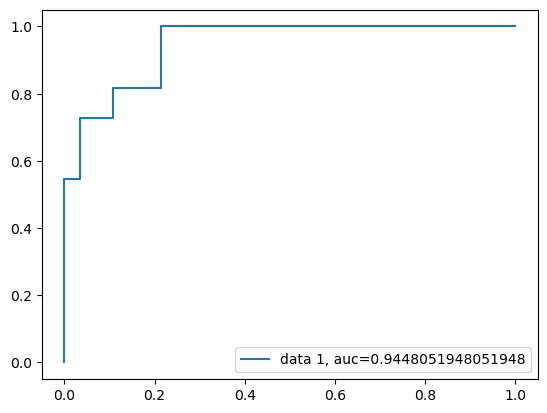

In [52]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc=" + str(auc))
plt.legend(loc=4)
plt.show()